<a href="https://colab.research.google.com/github/Gholamrezadar/Colab-notebooks/blob/main/Computer_Vision_Tamrin_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computer vision Tamrin 1

Gholamrezadar Nov 2020

**Check Navigation Pane on the left**

### Imports

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from google.colab.patches import cv2_imshow

# change colab output quality
mpl.rcParams['figure.dpi'] = 150

In [26]:
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png -O lena.png
!wget https://media.macphun.com/img/uploads/customer/blog/678/15358412605b8b13ecd913d1.66381360.jpg -O sky.jpg

--2020-11-07 21:57:49--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 462.73K  1.88MB/s    in 0.2s    

2020-11-07 21:57:50 (1.88 MB/s) - ‘lena.png’ saved [473831/473831]

--2020-11-07 21:57:50--  https://media.macphun.com/img/uploads/customer/blog/678/15358412605b8b13ecd913d1.66381360.jpg
Resolving media.macphun.com (media.macphun.com)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to media.macphun.com (media.macphun.com)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22681 (22K) [image/jpg]
Saving to: ‘sky.jpg’

sky.jpg             100%[===================>]  22.15

### Loading Lena

512x512


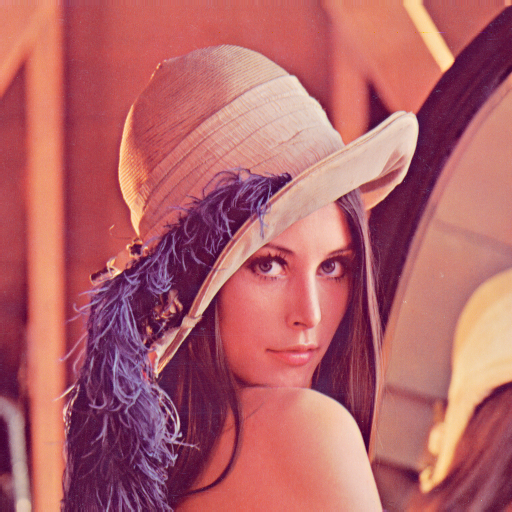

128x128


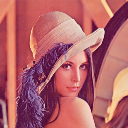

In [27]:
lena = cv2.imread("lena.png")
lena_128 = cv2.resize(lena,dsize = (128,128))
print("512x512")
cv2_imshow(lena)
print("128x128")
cv2_imshow(lena_128)

### 1.Resizing lena

resizing image based on different interpolation methods


*   Nearest Neighbor (Bad and aliased)
*   Bilinear (faster but still looks OK)
*   Bicubic (Best but slow)
*   Area (best for shrinking)



#### Shrink

open "files" tab on the left to view/download result


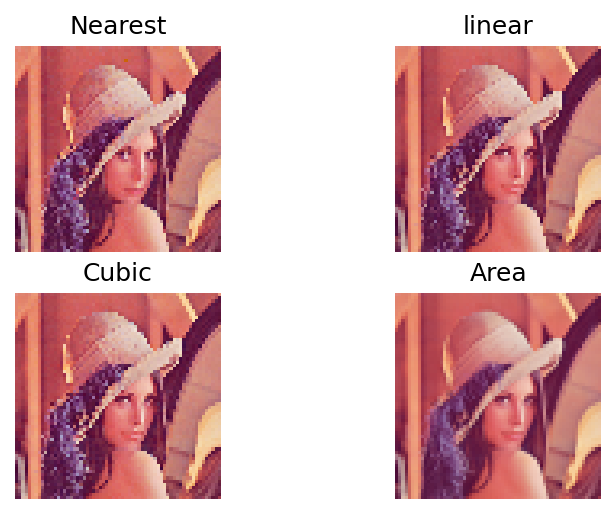

In [28]:
# Shrinking
small_nearest = cv2.resize(lena,dsize = (64,64), interpolation=cv2.INTER_NEAREST)
small_linear = cv2.resize(lena,dsize = (64,64), interpolation=cv2.INTER_LINEAR)
small_cubic = cv2.resize(lena,dsize = (64,64), interpolation=cv2.INTER_CUBIC)
small_area = cv2.resize(lena,dsize = (64,64), interpolation=cv2.INTER_AREA)

# plotting
plt.subplot(221),plt.imshow(cv2.cvtColor(small_nearest,cv2.COLOR_BGR2RGB),'gray'),plt.title('Nearest'),plt.axis("off")
plt.subplot(222),plt.imshow(cv2.cvtColor(small_linear,cv2.COLOR_BGR2RGB)),plt.title('linear'),plt.axis("off")
plt.subplot(223),plt.imshow(cv2.cvtColor(small_cubic,cv2.COLOR_BGR2RGB)),plt.title('Cubic'),plt.axis("off")
plt.subplot(224),plt.imshow(cv2.cvtColor(small_area,cv2.COLOR_BGR2RGB)),plt.title('Area'),plt.axis("off")

# open "files" tab on the left to view/download result
print('open "files" tab on the left to view/download result')
plt.savefig("shrink.jpg",dpi=300)
plt.show()
plt.close()


#### Zoom / Enlarge

open "files" tab on the left to view/download result


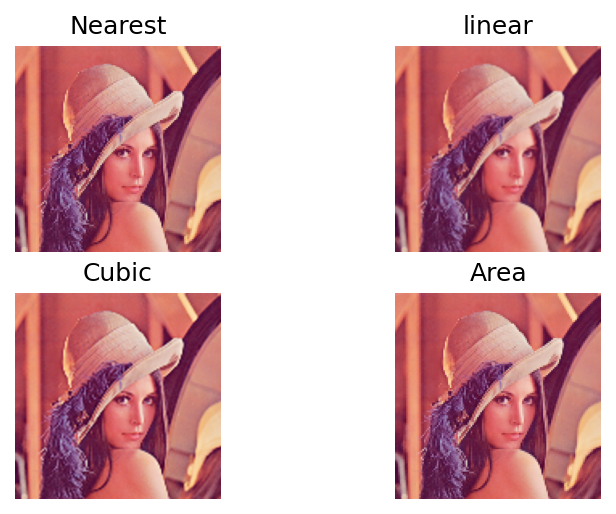

In [29]:
# Zoom/Enlarge ing
big_nearest = cv2.resize(lena_128,dsize = (1024,1024), interpolation=cv2.INTER_NEAREST)
big_linear = cv2.resize(lena_128,dsize = (1024,1024), interpolation=cv2.INTER_LINEAR)
big_cubic = cv2.resize(lena_128,dsize = (1024,1024), interpolation=cv2.INTER_CUBIC)
big_area = cv2.resize(lena_128,dsize = (1024,1024), interpolation=cv2.INTER_AREA)

# plotting
plt.subplot(221),plt.imshow(cv2.cvtColor(big_nearest,cv2.COLOR_BGR2RGB),'gray'),plt.title('Nearest'),plt.axis("off")
plt.subplot(222),plt.imshow(cv2.cvtColor(big_linear,cv2.COLOR_BGR2RGB)),plt.title('linear'),plt.axis("off")
plt.subplot(223),plt.imshow(cv2.cvtColor(big_cubic,cv2.COLOR_BGR2RGB)),plt.title('Cubic'),plt.axis("off")
plt.subplot(224),plt.imshow(cv2.cvtColor(big_area,cv2.COLOR_BGR2RGB)),plt.title('Area'),plt.axis("off")

# open "files" tab on the left to view/download result
print('open "files" tab on the left to view/download result')
plt.savefig("zoom.jpg",dpi=300)
plt.show()
plt.close()


### 2.Basics

#### image conversion

In [30]:
# convert png to jpg
png_image = cv2.imread("lena.png")
jpg_image = cv2.imwrite("lena.jpg",png_image)

# open "files" tab on the left to view/download result
print('open "files" tab on the left to view/download result')

open "files" tab on the left to view/download result


#### Negative

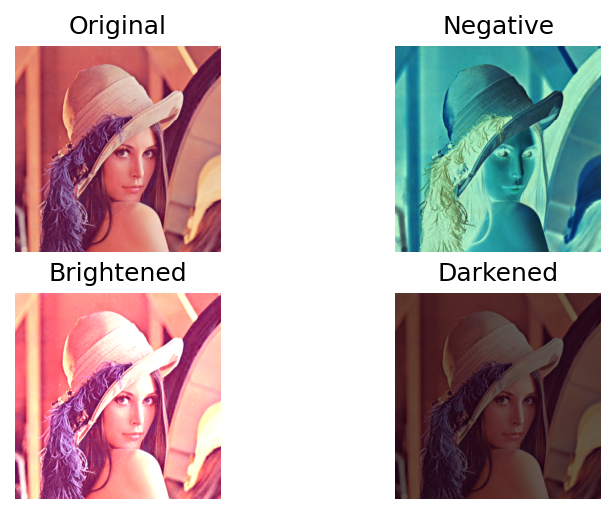

In [31]:
# Loading Original Image
original_image = cv2.imread("lena.png")

# Processing
negative_image = 255 - original_image
brightened_image = original_image*1.5
darkened_image = original_image/2.5


#clamping values between 0 and 255
negative_image = np.clip(negative_image,a_min=0, a_max=255)
brightened_image = np.clip(brightened_image,a_min=0, a_max=255)
darkened_image = np.clip(darkened_image,a_min=0, a_max=255)

# Plotting
plt.subplot(221),plt.imshow(cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)),plt.title('Original'),plt.axis("off")
plt.subplot(222),plt.imshow(cv2.cvtColor(negative_image.astype('uint8'),cv2.COLOR_BGR2RGB)),plt.title('Negative'),plt.axis("off")
plt.subplot(223),plt.imshow(cv2.cvtColor(brightened_image.astype('uint8'),cv2.COLOR_BGR2RGB)),plt.title('Brightened'),plt.axis("off")
plt.subplot(224),plt.imshow(cv2.cvtColor(darkened_image.astype('uint8'),cv2.COLOR_BGR2RGB)),plt.title('Darkened'),plt.axis("off")

plt.savefig("negative.jpg",dpi=300)
plt.show()
plt.close()

#### LOG and EXP

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


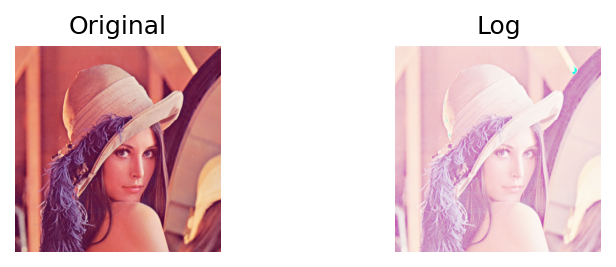

In [32]:
# Loading Original Image
original_image = cv2.imread("lena.png")

# calculate constant "C" and do S = C*log(R+1)
c = 255 / np.log(1 + np.max(original_image)) 
log_image = np.clip(c * (np.log(original_image + 1)) ,a_min=0, a_max=255)

# Plotting
plt.subplot(221),plt.imshow(cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)),plt.title('Original'),plt.axis("off")
plt.subplot(222),plt.imshow(cv2.cvtColor(log_image.astype('uint8'),cv2.COLOR_BGR2RGB)),plt.title('Log'),plt.axis("off")

plt.savefig("LOG.jpg",dpi=300)
plt.show()
plt.close()

### 3.Thresholding

#### Basic Thresholding

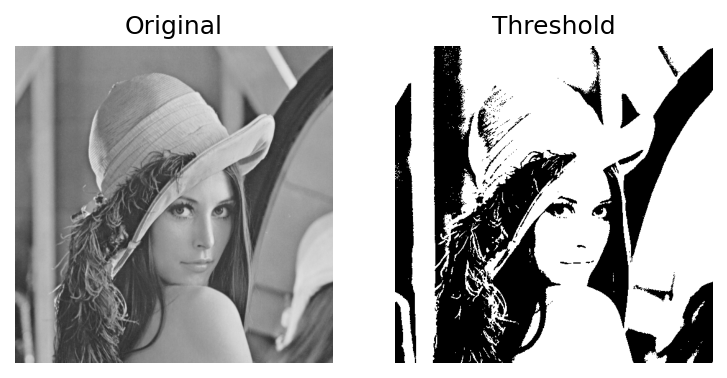

In [33]:
# Loading Original Image
original_image = cv2.imread("lena.png",cv2.IMREAD_GRAYSCALE)

# thresholding
ret,threshold = cv2.threshold(original_image,120,255,cv2.THRESH_BINARY)

# Plotting
plt.subplot(121),plt.imshow(cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)),plt.title('Original'),plt.axis("off")
plt.subplot(122),plt.imshow(cv2.cvtColor(threshold.astype('uint8'),cv2.COLOR_BGR2RGB)),plt.title('Threshold'),plt.axis("off")

plt.savefig("threshold.jpg",dpi=300)
plt.show()
plt.close()

### 4.Plotting Histogram

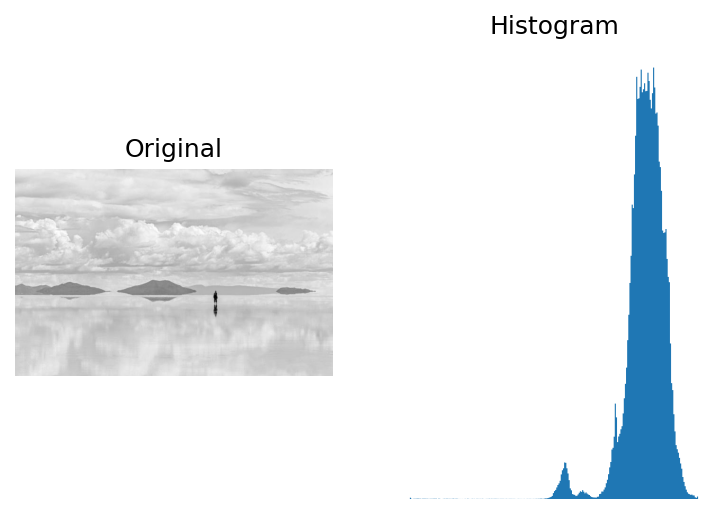

In [34]:
# Loading Original Image
original_image = cv2.imread("sky.jpg",cv2.IMREAD_GRAYSCALE)



# Plotting
plt.subplot(121),plt.imshow(cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)),plt.title('Original'),plt.axis("off")
plt.subplot(122),plt.hist(original_image.ravel(),256,[0,256],histtype="stepfilled"),plt.title('Histogram'),plt.axis("off")

plt.savefig("Histogram.jpg",dpi=300)
plt.show()
plt.close()

### 5.Histogram equalization

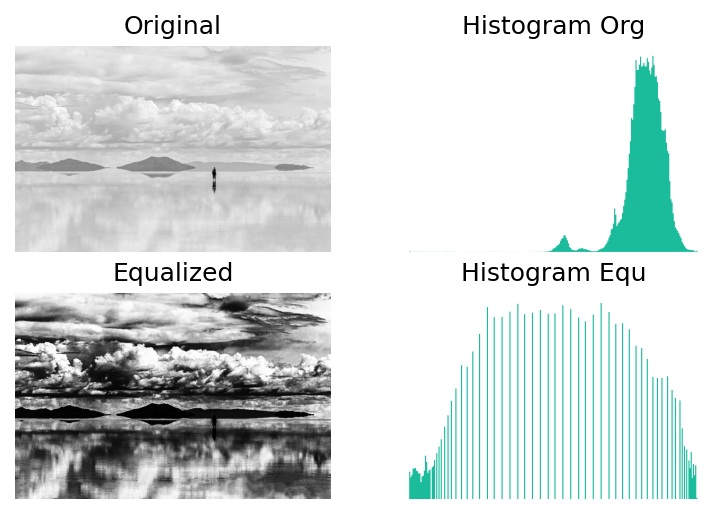

In [35]:
# Loading Original Image
original_image = cv2.imread("sky.jpg",cv2.IMREAD_GRAYSCALE)

# Histogram Equlaization

# equalized_image = cv2.equalizeHist(original_image)
hist,bins = np.histogram(original_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

equalized_image = cdf[original_image]

# Plotting
plt.subplot(221),plt.imshow(cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)),plt.title('Original'),plt.axis("off")
plt.subplot(222),plt.hist(original_image.ravel(),256,[0,256],histtype="stepfilled",color="#1abc9c"),plt.title('Histogram Org'),plt.axis("off")
plt.subplot(223),plt.imshow(cv2.cvtColor(equalized_image,cv2.COLOR_BGR2RGB)),plt.title('Equalized'),plt.axis("off")
plt.subplot(224),plt.hist(equalized_image.ravel(),256,[0,256],histtype="stepfilled",color="#1abc9c"),plt.title('Histogram Equ'),plt.axis("off")


plt.savefig("HistogramEqualized.jpg",dpi=300)
plt.show()
plt.close()

### 6.Guassian and Laplacian

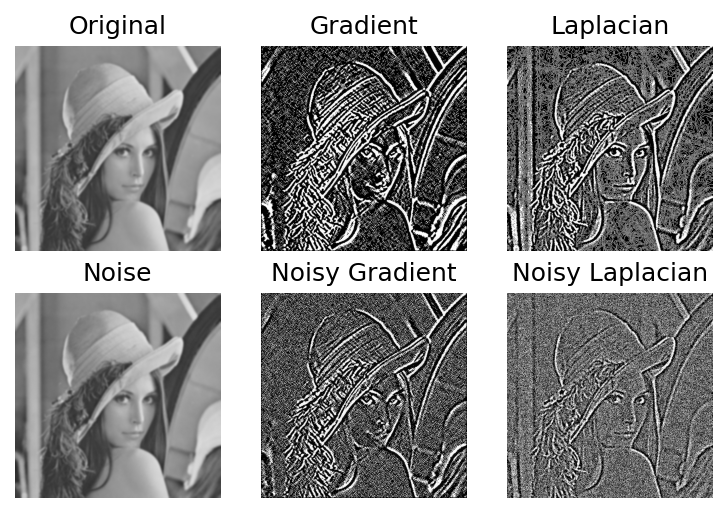

In [66]:
def noise(image):
    row,col= image.shape
    mean = 0
    var = 0.2
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = image + 2*gauss
    return noisy

# Loading Original Image
original_image = cv2.imread("lena.png",cv2.IMREAD_GRAYSCALE)
original_image = cv2.GaussianBlur(original_image,(11,11),0)

gradient_original = cv2.Sobel(original_image,cv2.CV_64F,1,1,ksize=1)
laplacian_original = cv2.Laplacian(original_image,cv2.CV_64F,ksize=1)

gaussian_noise_image = noise(original_image)

gradient_gaussian = cv2.Sobel(gaussian_noise_image,cv2.CV_64F,1,1,ksize=1)
laplacian_gaussian = cv2.Laplacian(gaussian_noise_image,cv2.CV_64F,ksize=1)



# Plotting
plt.subplot(231),plt.imshow(cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)),plt.title('Original'),plt.axis("off")
plt.subplot(232),plt.imshow(cv2.cvtColor(gradient_original.astype('uint8'),cv2.COLOR_BGR2RGB)),plt.title('Gradient'),plt.axis("off")
plt.subplot(233),plt.imshow(cv2.cvtColor(laplacian_original.astype('uint8'),cv2.COLOR_BGR2RGB)),plt.title('Laplacian'),plt.axis("off")
plt.subplot(234),plt.imshow(cv2.cvtColor(gaussian_noise_image.astype('uint8'),cv2.COLOR_BGR2RGB)),plt.title('Noise'),plt.axis("off")
plt.subplot(235),plt.imshow(cv2.cvtColor(gradient_gaussian.astype('uint8'),cv2.COLOR_BGR2RGB)),plt.title('Noisy Gradient'),plt.axis("off")
plt.subplot(236),plt.imshow(cv2.cvtColor(laplacian_gaussian.astype('uint8'),cv2.COLOR_BGR2RGB)),plt.title('Noisy Laplacian'),plt.axis("off")

plt.savefig("GaussianLaplacian.jpg",dpi=300)
plt.show()
plt.close()